# Problem RP8

In this Notebook, we present the RP8 problem of BBRC 2019 using the FORM SORM method and the Monte Carlo method

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb
import openturns.viewer as otv
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
problem = otb.ReliabilityProblem8()
print(problem)

name = RP8
event = class=ThresholdEventImplementation antecedent=class=CompositeRandomVector function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x1,x2,x3,x4,x5,x6,y0] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3,x4,x5,x6] outputVariablesNames=[y0] formulas=[x1 + 2 * x2 + 2 * x3 + x4 - 5 * x5 - 5 * x6] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3,x4,x5,x6] outputVariablesNames=[y0] formulas=[x1 + 2 * x2 + 2 * x3 + x4 - 5 * x5 - 5 * x6] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x1,x2,x3,x4,x5,x6] outputVariablesNames=[y0] formulas=[x1 + 2 * x2 + 2 * x3 + x4 - 5 * x5 - 5 * x6] antecedent=class=UsualRandomVector distribution=class=ComposedDistribution name=ComposedDistribution dimension=6 copula=class=IndependentC

In [3]:
event = problem.getEvent()
g = event.getFunction()

## Compute the bounds of the domain

In [4]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

In [5]:
inputDimension = distribution.getDimension()
inputDimension

6

In [6]:
alpha = 1.0 - 1.0e-5

bounds, marginalProb = distribution.computeMinimumVolumeIntervalWithMarginalProbability(
    alpha
)

In [7]:
referencePoint = distribution.getMean()
referencePoint

class=Point name=Unnamed dimension=6 values=[120,120,120,120,50,40]

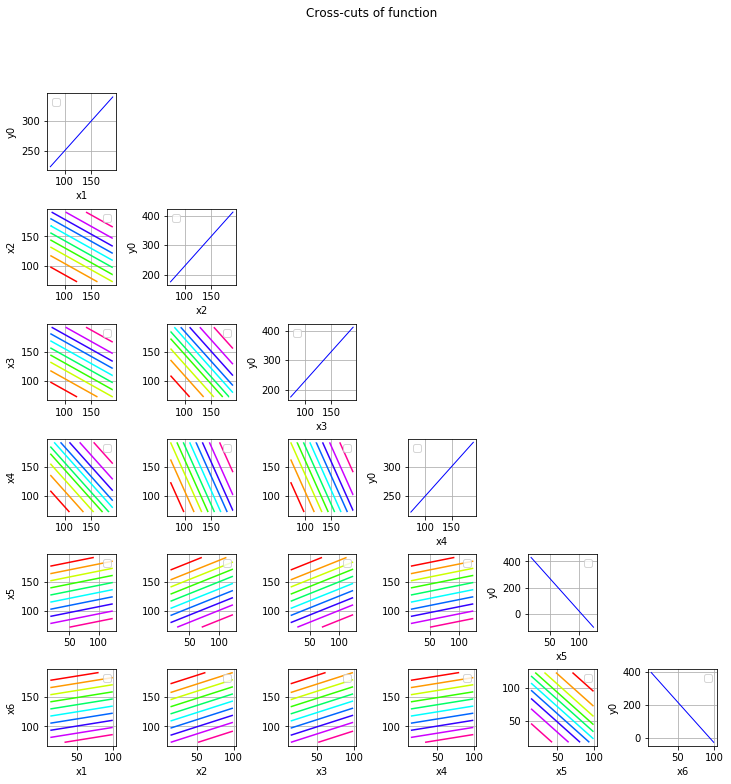

In [8]:
crossCut = otb.CrossCutFunction(g, referencePoint)
fig = crossCut.draw(bounds)
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.5, wspace=0.75)

## Plot cross-cuts of the distribution

In [9]:
crossCut = otb.CrossCutDistribution(distribution)

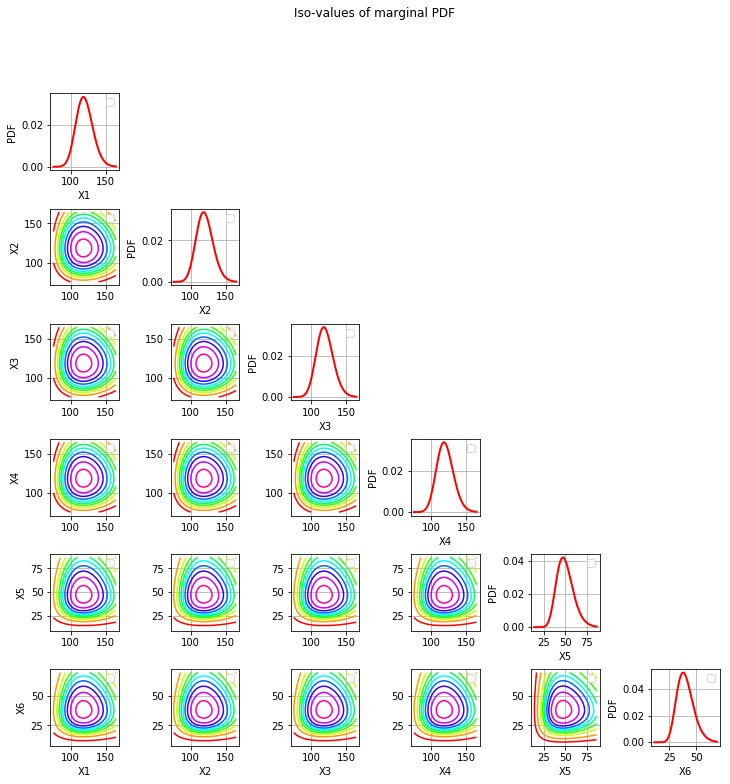

In [10]:
fig = crossCut.drawMarginalPDF()
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.5, wspace=0.75)

The correct way to represent cross-cuts of a distribution is to draw the contours of the PDF of the conditional distribution.

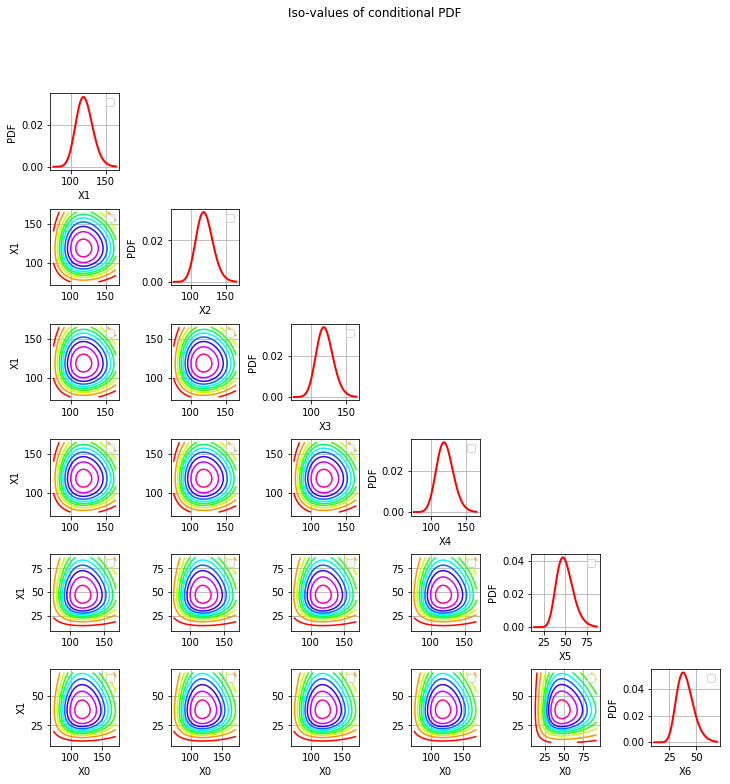

In [11]:
fig = crossCut.drawConditionalPDF(referencePoint)
# Remove the legend labels because there
# are too many for such a small figure
for ax in fig.axes:
    ax.legend("")
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.5, wspace=0.75)

In [12]:
inputVector = event.getAntecedent()
event = problem.getEvent()
g = event.getFunction()

In [13]:
drawEvent = otb.DrawEvent(event)

/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/osboxes/Documents/venvbbrc/lib/python3.7/site-packages/matplotlib/contour.py:1226: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were fo

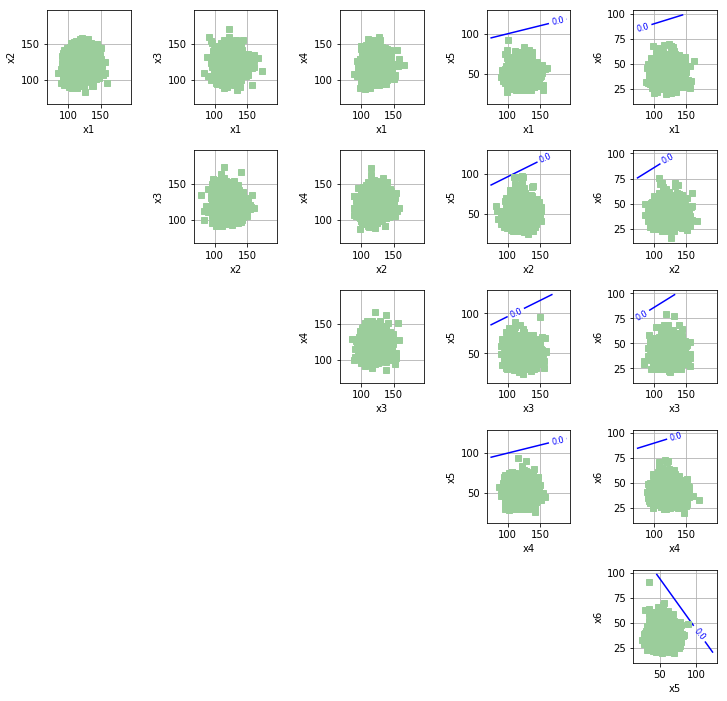

In [14]:
_ = drawEvent.draw(bounds)
# Increase space between sub-figures so that
# there are no overlap
plt.subplots_adjust(hspace=0.5, wspace=0.75)